In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.linear_model import BayesianRidge
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
data = pd.read_csv('grouped_single.csv')
data.drop('Unnamed: 0',axis = 1, inplace=True )
data.columns
data.head(2)

,customer_unique_id,Monetary,frequency,review_score_mean,payment_type_mode,product_w_mean,product_mode,recently
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,5.0,credit_card,1500.0,bed_bath_table,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,4.0,credit_card,375.0,health_beauty,113


In [4]:
df = data[['Monetary', 'frequency', 'recently']].copy()

### Clustering avec les données RFM
#### Standarisation des données

In [9]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.values)

In [6]:
scaled_data

array([[1.29811155e-03, 0.00000000e+00, 1.55680224e-01],
       [2.48736102e-04, 0.00000000e+00, 1.58485273e-01],
       [7.88746846e-04, 0.00000000e+00, 7.51753156e-01],
       ...,
       [1.02879228e-03, 0.00000000e+00, 7.95231417e-01],
       [1.22300587e-03, 0.00000000e+00, 1.65497896e-01],
       [6.54636097e-04, 0.00000000e+00, 6.76016830e-01]])

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

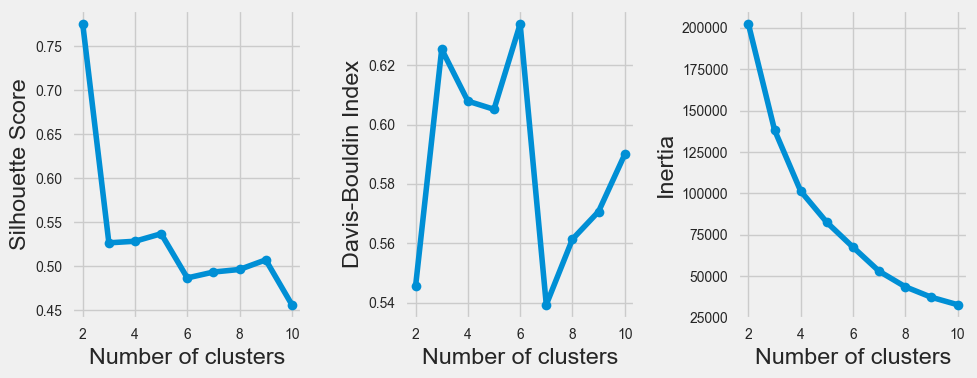

In [278]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Choosing a range of cluster numbers
min_clusters = 2
max_clusters = 10

silhouette_scores = []
davies_bouldin_scores = []
inertia_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(scaled_features, cluster_labels))
    inertia_scores.append(kmeans.inertia_)
    
# Plotting the scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(range(min_clusters, max_clusters + 1), davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davis-Bouldin Index')

plt.subplot(1, 3, 3)
plt.plot(range(min_clusters, max_clusters + 1), inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> * Le pic le plus élevé de la courbe du Silhouette_score représente le nb_cluster optimal qui correspond à la meilleure séparation entre les clusters (nb_clusters = 2) <br>  <br>
 * En ce qui concerne le Davis-Bouldin, le coude le plus bas correspond au nombre optimal de clusters (7). <br> <br> 
 * Selon l'approche de l'inertie, le nb_clusters optimale correspond au coude où l'évolution de l'inertie diminue plus lentement. <br> <br> <br>
 ** En faisant des recoupement sur les trois approches, on peut choisir comme nombre de  cluster optimal = 7 
    </h4>
</div>

### Visualisation détaillée du graph de silhouette avec yellowbrick

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


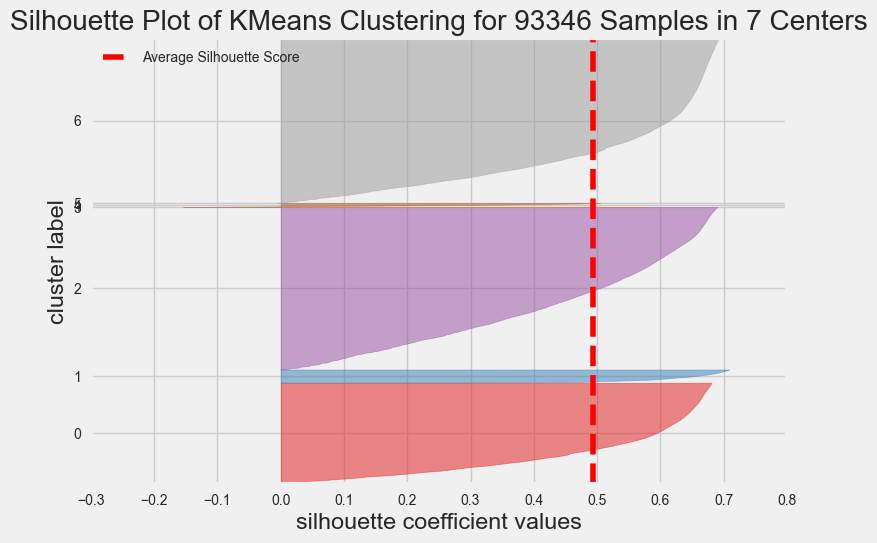

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 93346 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [279]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Choose the best number of clusters based on your analysis
best_n_clusters = 7

kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(scaled_features)
visualizer.show()

In [11]:
data.head()

,customer_unique_id,Monetary,frequency,review_score_mean,payment_type_mode,product_w_mean,product_mode,recently
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,5.0,credit_card,1500.0,bed_bath_table,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,4.0,credit_card,375.0,health_beauty,113
2,0000f46a3911fa3c0805444483337064,86.22,1,3.0,credit_card,1500.0,stationery,536
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1,4.0,credit_card,150.0,telephony,320
4,0004aac84e0df4da2b147fca70cf8255,196.89,1,5.0,credit_card,6050.0,telephony,287


C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


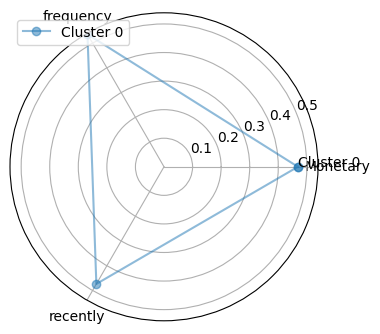

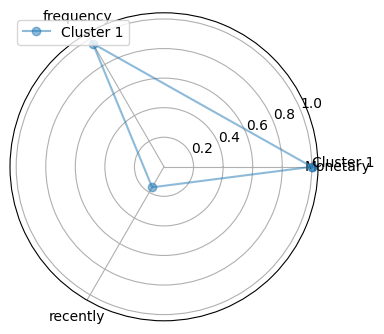

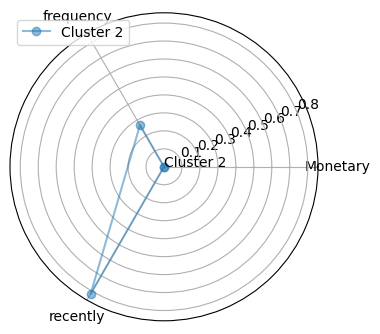

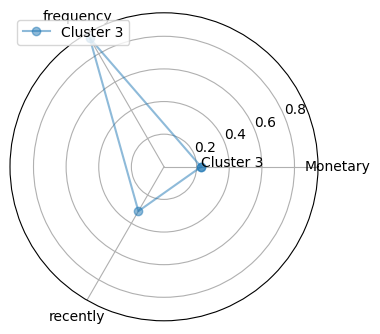

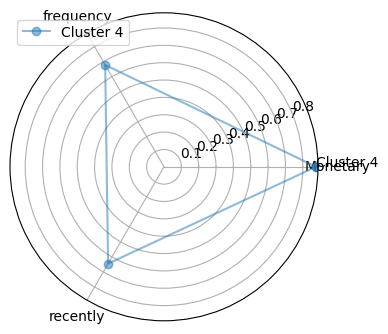

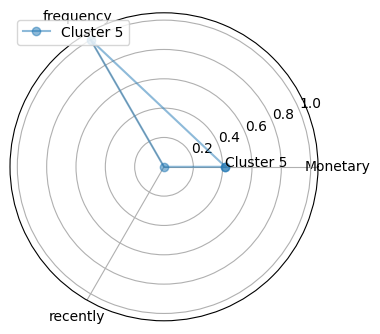

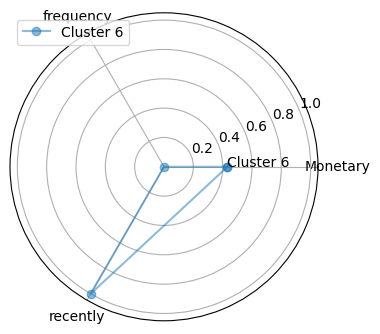

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Générer des données aléatoires pour l'exemple
np.random.seed(42)
#data = np.random.rand(10, 5)  # 10 échantillons, 5 variables

# Effectuer le K-Means clustering
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(scaled_data)
centroids = kmeans.cluster_centers_
centroids = scaler.fit_transform(centroids)

# Créer le graphique en radar
categories = df.columns
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Fermer la boucle

for i in range(num_clusters):
    plt.figure(figsize=(8, 4))
    cluster_data = centroids[i]
    cluster_data = np.concatenate((cluster_data, [cluster_data[0]]))  # Fermer la boucle
    plt.polar(angles, cluster_data, marker='o', alpha=0.5, label=f'Cluster {i}')
    # Étiqueter les groupes sur le graphique
    plt.annotate(f'Cluster {i}', xy=(angles[0], cluster_data[0]))
    plt.xticks(angles[:-1], categories)
    plt.legend(loc='upper left')
    plt.show()


#### Les clusters 4 et 6 sont bien représentés par rapport à la variables Monétary. Ainsi, on peut conclure que les clients des clusters 4 et 6 sont ceux qui contribuent le plus au CA de l'entreprise. <br>  Les autres clusters ne sont bien représentés par rapport à aucune variable. Ce pendant, le cluster 5 concentre les clients qui achètent le plus de produits en terme de fréquence. 

### Clustering avec tous les features

In [23]:
#data.columns
data = data[['customer_unique_id','Monetary', 'frequency', 'review_score_mean', 'product_w_mean', 'recently']]

In [24]:
num_vars = [x for x in data.columns if data[x].dtype != 'object']
num_vars

['Monetary', 'frequency', 'review_score_mean', 'product_w_mean', 'recently']

In [25]:
display(data.isna().sum())

customer_unique_id    0
Monetary              0
frequency             0
review_score_mean     0
product_w_mean        0
recently              0
dtype: int64

In [26]:
data.head(2)

,customer_unique_id,Monetary,frequency,review_score_mean,product_w_mean,recently
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1.0,5.0,1500.0,111.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1.0,4.0,375.0,113.0


### impute review_score_mean by IterativeImputer

In [17]:
num_vars = [x for x in data.columns if data[x].dtype != 'object']
imp = IterativeImputer(estimator=BayesianRidge())
num_vars_arr = data[num_vars].values
array = imp.fit_transform(num_vars_arr)
data[num_vars] = pd.DataFrame(array, columns= num_vars)
display(data.isna().sum())

customer_unique_id    0
Monetary              0
frequency             0
review_score_mean     0
product_w_mean        0
recently              0
dtype: int64

In [18]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data.iloc[:,1:].values)
scaled_features

array([[1.29811155e-03, 0.00000000e+00, 1.00000000e+00, 3.71057514e-02,
        1.55680224e-01],
       [2.48736102e-04, 0.00000000e+00, 8.43832969e-01, 9.27643785e-03,
        1.58485273e-01],
       [7.88746846e-04, 0.00000000e+00, 6.87665939e-01, 3.71057514e-02,
        7.51753156e-01],
       ...,
       [1.02879228e-03, 0.00000000e+00, 1.00000000e+00, 1.48423006e-02,
        7.95231417e-01],
       [1.22300587e-03, 0.00000000e+00, 1.00000000e+00, 1.09833024e-02,
        1.65497896e-01],
       [6.54636097e-04, 0.00000000e+00, 1.00000000e+00, 9.89486704e-03,
        6.76016830e-01]])

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

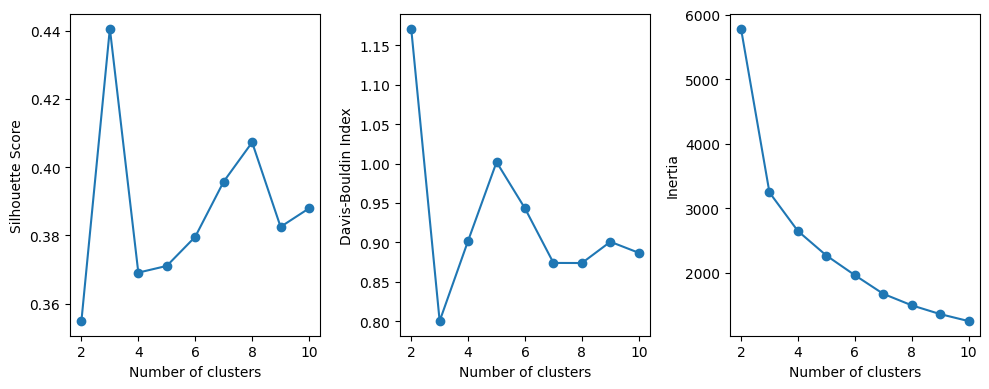

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Example data (replace this with your data)
# Choosing a range of cluster numbers
min_clusters = 2
max_clusters = 10

silhouette_scores = []
davies_bouldin_scores = []
inertia_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters) ### ne pas fixer random_state dans etude de la stabilité
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(scaled_features, cluster_labels))
    inertia_scores.append(kmeans.inertia_)
    
# Plotting the scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(range(min_clusters, max_clusters + 1), davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davis-Bouldin Index')

plt.subplot(1, 3, 3)
plt.plot(range(min_clusters, max_clusters + 1), inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()
### feature_rder_time.... pour le contrat de maintenance

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> * Le pic le plus élevé de la courbe du Silhouette_score représente le nb_cluster optimal qui correspond à la meilleure séparation entre les clusters (nb_clusters = 2) <br>  <br>
 * En ce qui concerne le Davis-Bouldin, le coude le plus bas correspond au nombre optimal de clusters (9). <br> <br> 
 * Selon l'approche de l'inertie, le nb_clusters optimale correspond au coude où l'évolution de l'inertie diminue plus lentement(7). <br> <br> <br>
 ** En faisant des recoupement sur les trois approches, on peut choisir comme nombre de  cluster optimal = 9
    </h4>
</div>

### Visualisation détaillée du graph de silhouette avec yellowbrick

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


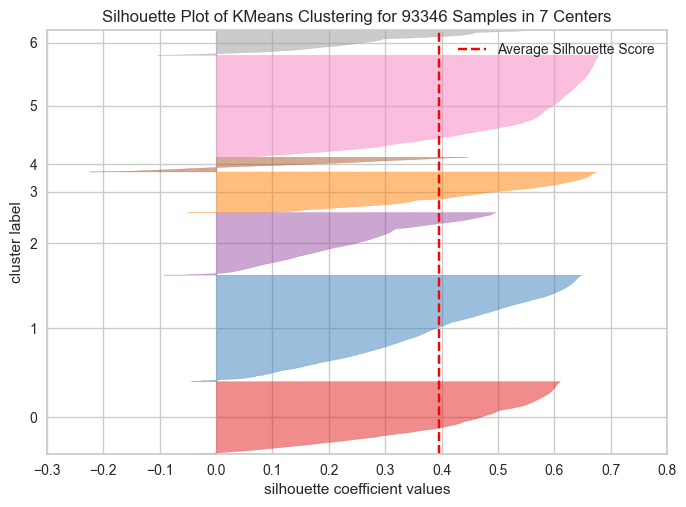

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 93346 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Choose the best number of clusters based on your analysis
best_n_clusters = 7

kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(scaled_features)
visualizer.show()

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


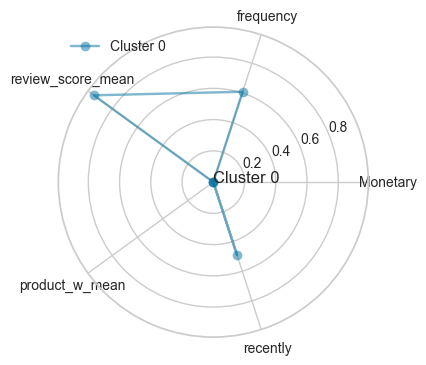

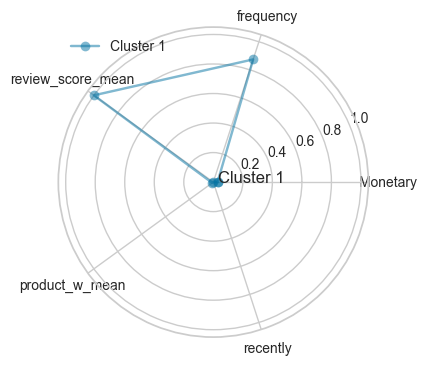

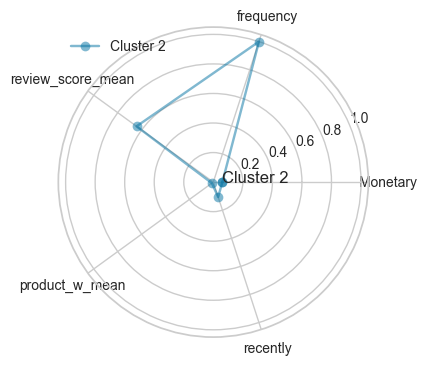

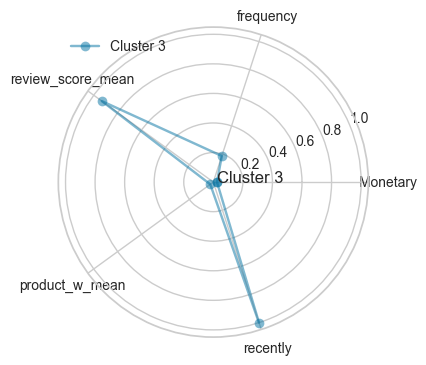

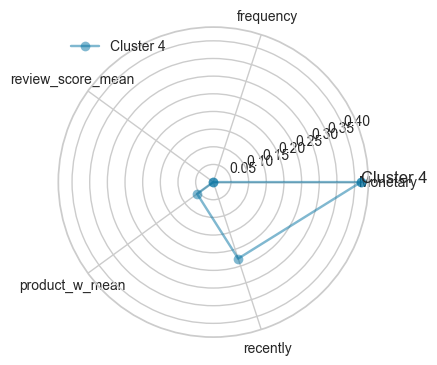

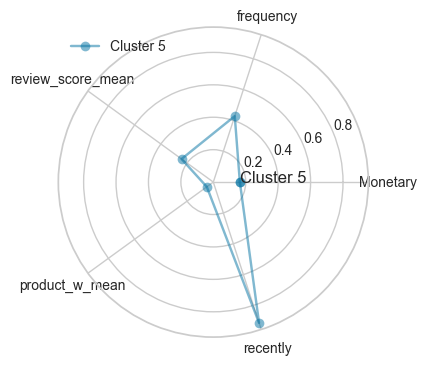

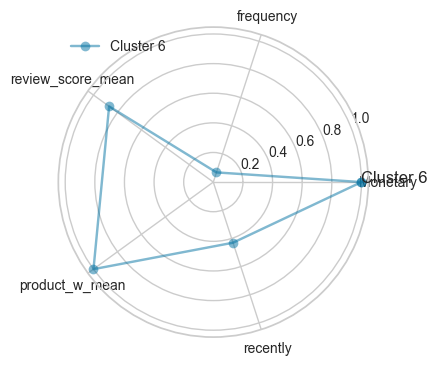

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Générer des données aléatoires pour l'exemple
np.random.seed(42)
#data = np.random.rand(10, 5)  # 10 échantillons, 5 variables

# Effectuer le K-Means clustering
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(scaled_features)
centroids = kmeans.cluster_centers_
centroids = scaler.fit_transform(centroids)
# Créer le graphique en radar
categories = data.iloc[:,1:].columns
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Fermer la boucle

for i in range(num_clusters):
    plt.figure(figsize=(4, 6))
    cluster_data = centroids[i]
    cluster_data = np.concatenate((cluster_data, [cluster_data[0]]))  # Fermer la boucle
    plt.polar(angles, cluster_data, marker='o', alpha=0.5, label=f'Cluster {i}')
    # Étiqueter les groupes sur le graphique
    plt.annotate(f'Cluster {i}', xy=(angles[0], cluster_data[0]))
    plt.xticks(angles[:-1], categories)
    plt.legend(loc='upper left')
    plt.show()


### ETIQUETTER LES GROUPES : 
  #### Cluster 0 :  regroupe les clients ayant fournit les notes d'évalutions les plus élevés, avec une fréquence d'achat de produit relativement élevée avec une contribution au CA quasiment nulle.       <br>  Cluster 1 :  Regroupe les clients ayant de très bonnes appréciations ainsi que des fréquences d'achats élevée. Cependant, la contribution au CA de l'entreprise reste faible,  de même que le produits achetés sont en général de très faible quantité. Nous précisons également, qu'ils y a longtemps ils n'ont pas passés de commandes        <br>  Cluster 2 :  Regroupe les clients qui sont restés longtemps sans commandes, avec des commandes à quantité très faibles a faible contribution au CA mais avec de très bonne appréciations et d'une fréquances de commandes élevée. <br> cluster 3 :  regroupe les clients qui ont fait des commandes tout récemment, avec de très bonnes appréciations. Ce pendant ils passent rarement de commandes, avec des produits à faible quantité et d'une contribution quasiment nulle au CA. <br>  Cluster 4 :  Il s'agit du groupe des clients contribuant le plus au CA avec des achats plus ou moins récents avec une faible fréquence d'achats. <br> Cluster 5 : Il s'agit des clients qui font des achats tout récemment avec une fréquence d'achat relativement importante et d'une contribution au CA relativement faible. <br> Cluster 6 : Il s'agit des clients ayant une forte contribution au CA, ayant de très bonnes appréciations aux services fournis. Il achètent des produits de gros calibres. Cependant, leur fréquece d'achat reste trop faible. 
  

#### Daprès les graphiques en radars, le meilleurs modèle caractérisant le mieux les clusters suivants les features est le modèles avec tous les features

### Stabilité de l'initialisation 

In [22]:
# Nombre d'initialisations différentes à tester
n_init = 8

# Liste pour stocker les résultats de chaque initialisation
cluster_assignments = []

# Exécutez K-Means avec différentes initialisations
for i in range(n_init):
    kmeans = KMeans(n_clusters=7)
    kmeans.fit(scaled_features)
    cluster_assignments.append(kmeans.labels_)

# Mesurez la stabilité des résultats en utilisant l'indice de Rand ajusté
# (plus élevé signifie une meilleure concordance entre les initialisations)
ari_scores = []
for i in range(n_init):
    for j in range(i+1, n_init):
        ari = adjusted_rand_score(cluster_assignments[i], cluster_assignments[j])
        ari_scores.append(ari)
# Affichez les scores ARI pour évaluer la stabilité
print(f"ARI Scores (Adjusted Rand Index) between initializations:\n{ari_scores}")
print(f"Mean ARI Score: {np.mean(ari_scores)}")

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

ARI Scores (Adjusted Rand Index) between initializations:
[0.9986766600812261, 0.9951183351483269, 0.9950910490014583, 0.9965495813618819, 0.9983669852890166, 0.9949865454605691, 0.9990976287435357, 0.9951680389043497, 0.9951249745010676, 0.9977057114386445, 0.9986186865488171, 0.9957304910360514, 0.9995785843146221, 0.9995834606840347, 0.9942504401342881, 0.9962967459251539, 0.9991739082700435, 0.9951773466051358, 0.9943996313421943, 0.9964458022816639, 0.9992841434294469, 0.9950954823373707, 0.9979479045945518, 0.9950611623482958, 0.9972848608434516, 0.9966170240856913, 0.9985891410192901, 0.995701153016407]
Mean ARI Score: 0.9968114813838065


#### Le Mean ARI = 0.99 (proche de 1), prouve que les clusters sont quasiment similaire pour les différentes initialisation. 